In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tempmatch as tm
from obspy import read, UTCDateTime as UTC


In [2]:
detectfiles = !ls /media/sda/data/borehole/detections/*.csv

In [3]:
df = pd.DataFrame()
for f in detectfiles:
    try:
        df = pd.concat([df, pd.read_csv(f)])
    except:
        pass

In [4]:
df['time'] = pd.to_datetime(df['time'])

In [5]:
df = df.sort_values(by='time')

In [6]:
df['ones'] = 1

In [7]:
df.set_index('time', inplace=True)

Text(0, 0.5, 'cumulative number of events')

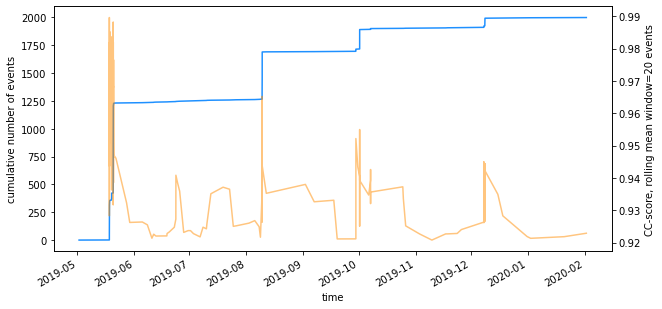

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))
df.cumsum()['ones'].plot(ax=ax, color='dodgerblue')

ax2 = ax.twinx()
df.similarity.rolling(window=20).mean().plot(ax=ax2, color='darkorange', alpha=0.5)
ax2.set_ylabel('CC-score, rolling mean window=20 events')
# ax.set_yscale('log')
ax.set_ylabel('cumulative number of events')

In [29]:
df.loc[(df.index>='2019-07-01')].head(10)

,similarity,template_id,ones
time,,,
2019-07-01 00:22:05.193001+00:00,0.883926,0,1
2019-07-01 01:38:09.192001+00:00,0.879919,0,1
2019-07-01 05:26:24.190001+00:00,0.892028,0,1
2019-07-01 07:59:14.191001+00:00,0.897590,0,1
2019-07-01 09:15:43.193001+00:00,0.899744,0,1
2019-07-01 10:32:46.196001+00:00,0.913378,0,1
2019-07-01 11:49:56.199001+00:00,0.918409,0,1
2019-07-01 13:07:54.201001+00:00,0.909461,0,1
2019-07-01 14:24:45.202001+00:00,0.922204,0,1


<AxesSubplot:>

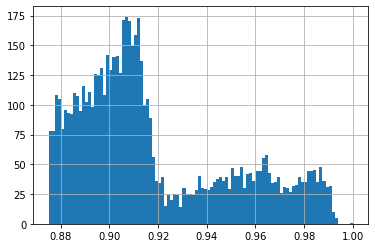

In [35]:
df.similarity.hist(bins=100)

In [20]:
nonevent = tm.digest_data('/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.01.GDH.2019.182')
nonevent += tm.digest_data('/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.02.GDH.2019.182')
nonevent += tm.digest_data('/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.03.GDH.2019.182')
nonevent += tm.digest_data('/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.04.GDH.2019.182')
nonevent += tm.digest_data('/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.05.GDH.2019.182')


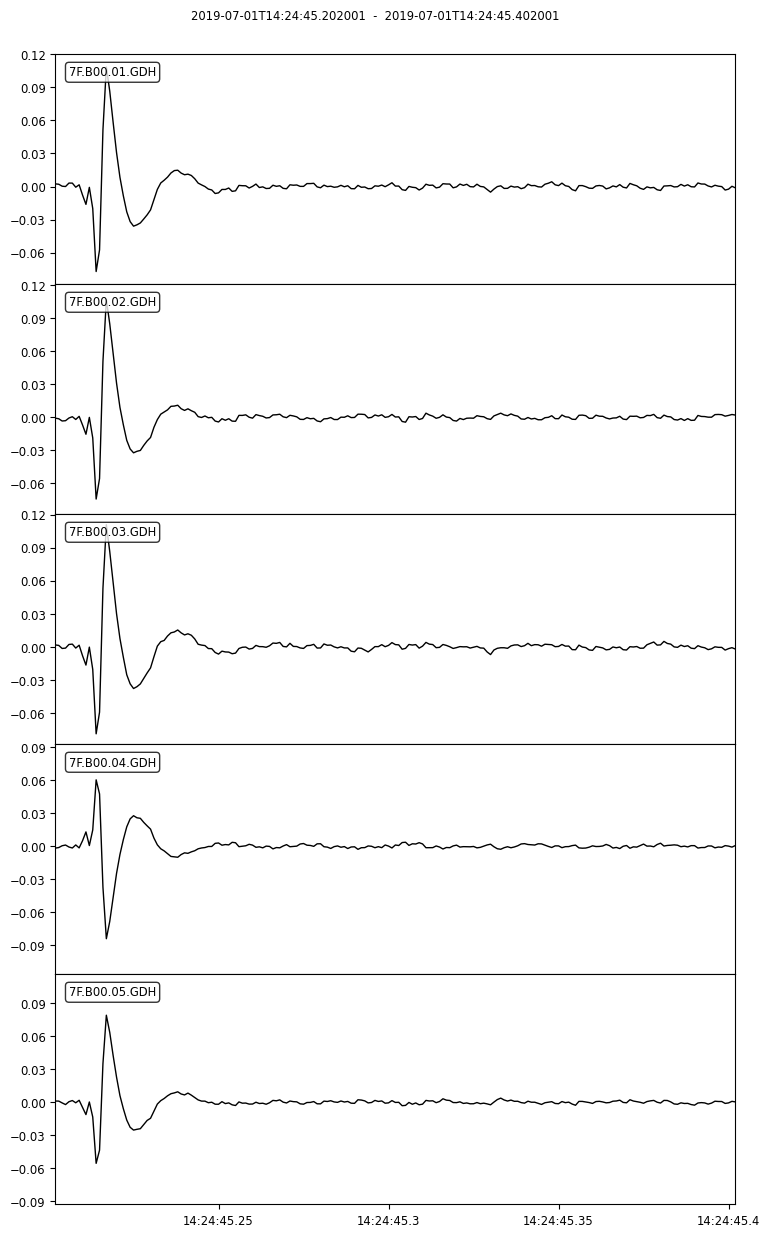

In [37]:
# starttime = UTC('2019-07-01 00:22:05.193001')
# starttime = UTC('2019-07-01 09:15:43.193001')
# starttime = UTC('2019-07-01 05:26:24.190001')
starttime = UTC('2019-07-01 14:24:45.202001')

_ = nonevent.plot(starttime=starttime, endtime=starttime+0.2)

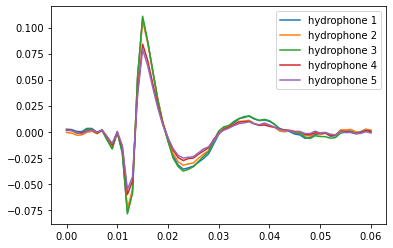

In [49]:
fig, ax = plt.subplots()

d = nonevent.copy()
d = d.trim(starttime=starttime, endtime=starttime+0.06)

d[3].data = d[3].data*-1

for tr in d:
    ax.plot(tr.times(), tr.data)
    
ax.legend(['hydrophone {n}'.format(n=n) for n in np.arange(0, len(d))+1])

In [68]:
days_count = df.groupby(pd.Grouper(freq='1D')).sum()
days_count[days_count.ones > 2]

,similarity,template_id,ones
time,,,
2019-05-18 00:00:00+00:00,196.475488,0,207
2019-05-19 00:00:00+00:00,39.556439,0,42
2019-05-20 00:00:00+00:00,326.496506,0,348
2019-05-21 00:00:00+00:00,2.747345,0,3
2019-05-23 00:00:00+00:00,2.655458,0,3
2019-06-01 00:00:00+00:00,2.646086,0,3
2019-06-11 00:00:00+00:00,3.568960,0,4
2019-06-15 00:00:00+00:00,2.654263,0,3
2019-06-19 00:00:00+00:00,2.639354,0,3
